# CAICT 風機結冰預測 - Data Preprocess

2017/07/12  
http://www.industrial-bigdata.com/competition/competitionAction!showDetail.action?competition.competitionId=1

## 1. 題目簡介

### 1.1 赛程安排
本次大赛分为初赛和复赛两个阶段，其中：初赛由参赛队伍下载数据在本地进行算法设计和调试；复赛要求参赛者进行现场答辩。具体安排和要求如下：  

#### 初赛（2017年6月15日—9月1日）  
- 1、6月15日打开报名通道，9月1日关闭报名通道，报名规则详见组队规则。  
- 2、参赛队伍$\color{blue}{7月3日可下载数据}$，并在本地调试算法，提交结果。  
- 3、7月3日起提供每天1 次的评测和排名机会，选手上传数据即可获得评分与排名，实时更新排行榜，按照评测指标从高到低排序；(排行榜将选择选手在本阶段的历史最优成绩进行排名展示，不做最终排名计算)。  
- 4、$\color{blue}{8月18日组委会将提供最终数据}$，所有参赛者对这组数据仅有一次提交机会，且选手除提交数据外，还需上传技术原理及相关源代码，参赛者的初赛最终成绩将由这组最终数据的预测结果决定。 注：不提供技术原理及相关代码的队伍，初赛成绩视为无效。    
- 5、$\color{blue}{9月1日关闭报名通道且最终数据结果提交截止}$。  
- 6、$\color{blue}{9月8日初赛排名团队公布}$。  
- 7、初赛截止时间是9月8日18:00，同时满足以下条件的队伍进入复赛：  
- a.在大赛官方完成注册且“昵称/姓名/邮箱/队名和队伍结构“一致。  
- b.初赛成绩排名前5名。  
- c.参赛队伍需要提供源代码和技术文档（技术文档应包括算法原理）。编程语言不限（java,scala, python，r均可）。  

#### 复赛（2017年9月中旬）  
- 复赛将聘请专家在以现场答辩会的形式对参赛队伍的算法原理、代码质量等进行评审，结合初赛排行榜评比出比赛前三名(排行榜的成绩占80%，专家答辩会的成绩占20%)。 
- 获奖团队奖受邀参与高峰论坛暨颁奖仪式。  

### 1.2 问题描述
叶片结冰：叶片结冰是风电领域的一个全球范围难题。$\color{blue}{低温环境}$所导致的叶片结冰、材料及结构性能改变、载荷改变的问题等，对风机的发电性能和安全运行造成较大的威胁。随着风机的设计功率不断提升，现有风机塔筒高度也在不断增长，因此即使在北部沿海和山区地区，$\color{blue}{冬季里大量风机都会触碰到较低的云层，在低温和潮湿环境下非常容易结冰}$。目前风机运行的实时数据主要由SCADA（注）系统进行存储，对叶片结冰故障的监测手段主要是比较风机实际功率与理论功率之间的偏差，当偏差达到一定值后会触发风机的报警和停机。然而，触发报警时往往已经发生叶片大面积结冰现象，在这样的情况下运行会增加叶片折断损坏的风险。虽然许多新型风机都设计了自动除冰系统，但是$\color{blue}{实际应用中面临的挑战是很难对结冰的早期过程进行精确预测}$，以便能够尽早开启除冰系统。对结冰过程的预测准确度决定了除冰系统的效率、风机的效率损失和风机运行的风险。  

注：SCADA是风场设备管理、监测、和控制的重要系统，通过实时收集风机运行的环境参数、工况参数、状态参数和控制参数使风场管理者能够实时了解风电装备资产的运行和健康状态。  

SCADA系统每天产生大量的数据，但是$\color{blue}{目前大部分的系统依然局限于对已发生故障的报警}$。这些故障到达报警阶段时往往已经比较严重，需要对风机进行停机和维修，造成巨大的发电损失和维护成本。通过对SCADA系统产生的大数据环境进行挖掘和建模，能够对一些严重故障进行预测和诊断，从而$\color{blue}{使过去应激型的维护方式转变为主动预测型的维护方式}$，能够有效地改善风电设备的使用率和运维成本。

### 1.3 评分规则
参赛者在提交结果后，系统将根据以下规则自动对结果进行评分：
- 故障时间区间覆盖的数据行标记为1。
- 正常时间区间覆盖的数据行标记为0。
- 无效数据不参与评价。
![](doc/score.png)

### 1.4 训练与测试数据集描述
'train'数据集中包括两个风机的数据，存在两个以风机编号命名的文件夹中。每个文件夹中的数据包括三个文件：  
- 编号_data.csv：风机连续时间内的SCADA原始数据（详细内容如表一所示）。  
- 编号_normalinfo.csv：风机正常状态的时间段，第一列为起始时间，第二列为结束时间。  
- 编号_failureinfo.csv：风机结冰故障的时间段，第一列为起始时间，第二列为结束时间。  
- 风机正常时间区间和风机结冰时间区间均不覆盖的数据视为无效数据。  
  
'test'测试数据集和'final'最终数据集，数据集中同样有若干个以风机编号为命名的文件夹，每个文件夹中包括一个文件：
- 编号_data.csv：风机连续时间内的SCADA原始数据。  
  
需要注意的是  
- 'train'数据集中'time'变量和一列为真实的时间戳，会存在数据不连续的情况，期间会出现停机或人为删除部分数据的情况；
- 'test'和'final'数据集中的'time'变量为连续的数字序号，序号的排列是按照时间的先后顺序，但中间会存在由于停机等原因造成的数据不连续情况

# **1. Load Data and Modules**

**Load Python modules:**

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import pandas as pd
import os
import sys
from PIL import Image
import numpy as np
import lzma
import pickle
from IPython.display import display
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import shutil
import csv
import sklearn as sk
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import *

pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def timerangeCheck(t, start, end):
    return (t>=start) & (t<=end)

def variable_summaries(var, name):  
    with tf.name_scope('summaries_'+str(name)):  
        mean = tf.reduce_mean(var)  
        tf.summary.scalar('mean', mean)  
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))  
        tf.summary.scalar('stddev', stddev)  
        tf.summary.scalar('max', tf.reduce_max(var))  
        tf.summary.scalar('min', tf.reduce_min(var))  
        tf.summary.histogram('histogram', var)  
        
def updateProgress(msg):
    sys.stdout.write('\r')
    sys.stdout.write(msg)
    sys.stdout.flush()
    
    

**Load input data.** 

In [4]:
train_data = pd.read_csv('data/ice1/train/15/15_data.csv')
train_normlabel = pd.read_csv('data/ice1/train/15/15_normalInfo.csv')
train_abnormlabel = pd.read_csv('data/ice1/train/15/15_failureInfo.csv')

valida_data = pd.read_csv('data/ice1/train/21/21_data.csv')
valida_normlabel = pd.read_csv('data/ice1/train/21/21_normalInfo.csv')
valida_abnormlabel = pd.read_csv('data/ice1/train/21/21_failureInfo.csv')

test_data = pd.read_csv('data/ice1/test/08/08_data.csv')

column_desc=pd.read_csv('doc/columndesc.csv')

# 2. Initial Exploration
**Look at your data in as many different ways as possible.**

**数据描述**

SCADA系统的数据通常有上百个变量，本次竞赛的数据经过筛选保留了其中28个连续数值型变量，涵盖了
- 风机的工况参数、
- 环境参数和
- 状态参数 
等多个维度。变量的名称及说明如下表所示：     
  
叶片结冰比赛，此次公布的数据有两组，分别是  
- 带有故障标签的训练数据train，和  
- 一起公布测试数据test。  

参赛团队对测试数据中的文件所代表的状态进行预测后，可以提交到竞赛网站上进行评分，每天限提交一次结果。评分系统将根据评分规则对参赛者的每一次提交反馈一个分数，但不会提供每一个文件的预测结果信息。
在8月18日组委会将提供初赛最终数据（final），所有参赛者对这组数据仅有一次提交机会，参赛者的最终成绩将来自于对这组最终数据的预测结果。

In [5]:
column_desc

,字段名,说明
0,time,时间戳
1,wind_speed,风速
2,generator_speed,发电机转速
3,power,网侧有功功率(kw)
4,wind_direction,对风角(°)
5,wind_direction_mean,25秒平均风向角
6,yaw_position,偏航位置
7,yaw_speed,偏航速度
8,pitch1_angle,叶片1角度
9,pitch2_angle,叶片2角度


#### 风机的工况、环境、状态參數

In [6]:
print('training data size:',train_data.shape)
print('validation data size:',valida_data.shape)
print('test data size:',test_data.shape)
train_data.head(5)

training data size: (393886, 28)
validation data size: (190494, 28)
test data size: (202328, 28)


,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,pitch1_speed,pitch2_speed,pitch3_speed,pitch1_moto_tmp,pitch2_moto_tmp,pitch3_moto_tmp,acc_x,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,2015-11-01 20:20:16,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,0.551111,-1.68,-1.72,-1.68,0.759,0.600,0.590,-1.023986,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,2015-11-01 20:20:23,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,0.191111,0.00,0.00,0.00,0.769,0.609,0.600,1.225767,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,2015-11-01 20:20:30,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,0.960000,-1.88,-1.84,-1.64,0.769,0.609,0.609,0.100890,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,2015-11-01 20:20:37,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,0.177778,0.00,0.00,0.00,0.780,0.630,0.619,0.100890,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,2015-11-01 20:20:47,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,0.204444,0.00,0.00,0.00,0.780,0.630,0.619,-1.023986,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1


In [7]:
train_data.describe()

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,pitch1_speed,pitch2_speed,pitch3_speed,pitch1_moto_tmp,pitch2_moto_tmp,pitch3_moto_tmp,acc_x,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
count,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000,393886.000000
mean,-0.191960,-0.179717,-0.186445,-0.038769,-0.029129,0.062334,-0.003912,0.358042,0.354336,0.364184,0.000628,0.000572,0.000446,-1.135335,-1.150431,-1.131319,0.069699,-0.152925,-0.434677,-0.489827,0.901730,0.903601,0.877262,0.221418,0.379987,0.347584,1924.584926
std,0.914071,0.986147,0.904671,1.066382,1.142581,0.916932,0.176156,0.718962,0.715185,0.717325,0.370132,0.371338,0.345625,0.733717,0.698257,0.693738,0.831980,0.692905,1.064107,1.099583,0.239209,0.238215,0.220438,1.033161,0.983804,1.148018,1111.546402
min,-2.292657,-2.382734,-1.119719,-5.333827,-9.270093,-1.767166,-2.445940,0.080000,0.066667,0.088889,-9.720000,-10.200000,-9.520000,-2.539000,-2.520000,-2.550000,-5.523493,-8.833311,-2.692108,-3.025473,0.429231,0.398462,0.446154,-3.720000,-3.720000,-3.280000,1.000000
25%,-0.835910,-1.159574,-0.875135,-0.784877,-0.777959,-0.614620,-0.038964,0.204444,0.204444,0.208889,0.000000,0.000000,0.000000,-1.679000,-1.670000,-1.650000,0.100890,0.061109,-1.241870,-1.400106,0.692308,0.692308,0.676923,-0.640000,-0.440000,-0.520000,960.000000
50%,-0.356474,-0.441632,-0.537001,-0.071892,-0.028168,-0.370142,-0.004080,0.217778,0.217778,0.217778,0.000000,0.000000,0.000000,-1.119000,-1.119000,-1.100000,0.100890,0.061109,-0.482822,-0.614194,0.875385,0.875385,0.860000,0.000000,0.240000,0.200000,1923.000000
75%,0.296296,0.964338,0.279006,0.696337,0.734287,1.050084,0.065687,0.328889,0.320000,0.324444,0.000000,0.000000,0.000000,-0.680000,-0.690000,-0.669000,0.100890,0.061109,0.306209,0.435601,1.090769,1.090769,1.061538,0.920000,1.120000,1.400000,2888.000000
max,5.835621,1.542680,2.579883,5.417923,7.549526,3.110697,5.228478,10.195556,10.160000,10.200000,15.880000,15.400000,15.640000,1.860000,1.950000,1.679000,6.850151,7.684898,2.813749,1.814295,1.476923,2.444615,1.615385,3.280000,3.600000,3.240000,3853.000000


### *Missing values*

In [8]:
print(train_data.info())
print('----------')
print(valida_data.info())
print('----------')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393886 entries, 0 to 393885
Data columns (total 28 columns):
time                   393886 non-null object
wind_speed             393886 non-null float64
generator_speed        393886 non-null float64
power                  393886 non-null float64
wind_direction         393886 non-null float64
wind_direction_mean    393886 non-null float64
yaw_position           393886 non-null float64
yaw_speed              393886 non-null float64
pitch1_angle           393886 non-null float64
pitch2_angle           393886 non-null float64
pitch3_angle           393886 non-null float64
pitch1_speed           393886 non-null float64
pitch2_speed           393886 non-null float64
pitch3_speed           393886 non-null float64
pitch1_moto_tmp        393886 non-null float64
pitch2_moto_tmp        393886 non-null float64
pitch3_moto_tmp        393886 non-null float64
acc_x                  393886 non-null float64
acc_y                  393886 non-null float

#### 風機異常時間

In [9]:
train_abnormlabel.head(3)

,startTime,endTime
0,2015-11-04 21:37:06,2015-11-04 22:29:33
1,2015-11-09 04:43:09,2015-11-09 06:35:39
2,2015-11-09 21:21:52,2015-11-09 23:14:41


#### 風機正常時間

In [10]:
train_normlabel.head(3)

,startTime,endTime
0,2015-11-01 20:20:16,2015-11-03 23:47:32
1,2015-11-04 14:04:51,2015-11-04 18:26:08
2,2015-11-05 11:06:59,2015-11-09 02:44:31


** 把time轉成datetime, 方便後續的時間比對操作. ** 

In [11]:
train_data['time']=pd.to_datetime(train_data['time'])
train_data = train_data.sort_values(by='time')
train_data['timestamp'] = train_data['time'].apply(lambda x: x.timestamp())

valida_data['time']=pd.to_datetime(valida_data['time'])
valida_data = valida_data.sort_values(by='time')
valida_data['timestamp'] = valida_data['time'].apply(lambda x: x.timestamp())

In [12]:
train_normlabel['startTime']=pd.to_datetime(train_normlabel['startTime'])
train_normlabel['endTime']=pd.to_datetime(train_normlabel['endTime'])
train_normlabel = train_normlabel.sort_values(by='startTime')

valida_normlabel['startTime']=pd.to_datetime(valida_normlabel['startTime'])
valida_normlabel['endTime']=pd.to_datetime(valida_normlabel['endTime'])
valida_normlabel = valida_normlabel.sort_values(by='startTime')

train_abnormlabel['startTime']=pd.to_datetime(train_abnormlabel['startTime'])
train_abnormlabel['endTime']=pd.to_datetime(train_abnormlabel['endTime'])
train_abnormlabel = train_abnormlabel.sort_values(by='startTime')

valida_abnormlabel['startTime']=pd.to_datetime(valida_abnormlabel['startTime'])
valida_abnormlabel['endTime']=pd.to_datetime(valida_abnormlabel['endTime'])
valida_abnormlabel = valida_abnormlabel.sort_values(by='startTime')

** 風機參數與風機狀態的數據對應 ** 

In [13]:
%%timeit -n 1 -r 1 -o
for i in range(train_abnormlabel.shape[0]):
    startTime, endTime = train_abnormlabel.iloc[i]
    subset=train_data['time'].apply(lambda x: timerangeCheck(x,startTime,endTime))
    train_data.loc[subset, 'label']=1

for i in range(train_normlabel.shape[0]):
    startTime, endTime = train_normlabel.iloc[i]
    subset=train_data['time'].apply(lambda x: timerangeCheck(x,startTime,endTime))
    train_data.loc[subset, 'label']=0
    
for i in range(valida_abnormlabel.shape[0]):
    startTime, endTime = valida_abnormlabel.iloc[i]
    subset=valida_data['time'].apply(lambda x: timerangeCheck(x,startTime,endTime))
    valida_data.loc[subset, 'label']=1

for i in range(valida_normlabel.shape[0]):
    startTime, endTime = valida_normlabel.iloc[i]
    subset=valida_data['time'].apply(lambda x: timerangeCheck(x,startTime,endTime))
    valida_data.loc[subset, 'label']=0
    
    

1min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 1min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

** 刪除無效數據 **  不要刪除, 改成標另一個符號!!!   
风机正常时间区间和风机结冰时间区间均不覆盖的数据视为无效数据

In [14]:
#print('刪除前：','訓練數據：',train_data.shape, ',  驗證數據：',valida_data.shape)
#train_data = train_data.dropna()
#valida_data = valida_data.dropna()
#print('刪除後：','訓練數據：',train_data.shape, ',  驗證數據：',valida_data.shape)

In [15]:
train_data = train_data.fillna(-1)
valida_data = valida_data.fillna(-1)

** Training Data (風機編號15) 風機狀態正常(0)/異常(1)比例 **

In [16]:
#train_data['label'].value_counts
train_abnormal = train_data[train_data['label']==1]
train_normal = train_data[train_data['label']==0]
normal_col = "green"
abnormal_col = "red"

msg = '正常:{i} ({j:.2f} percent), 結冰:{k:} ({m:.2f} percent), Total:{n}'.format(i=len(train_normal), j=len(train_normal)/len(train_data),k=len(train_abnormal),m=len(train_abnormal)/len(train_data), n=len(train_data))
print(msg)

正常:350255 (0.89 percent), 結冰:23892 (0.06 percent), Total:393886


** Validation Data (風機編號21) 風機狀態正常(0)/異常(1)比例 **

In [17]:
#valida_data['label'].value_counts()
valida_abnormal = valida_data[valida_data['label']==1]
valida_normal = valida_data[valida_data['label']==0]

msg = '正常:{i} ({j:.2f} percent), 結冰:{k:} ({m:.2f} percent), Total:{n}'.format(i=len(valida_normal), j=len(valida_normal)/len(valida_data),k=len(valida_abnormal),m=len(valida_abnormal)/len(valida_data), n=len(valida_data))
print(msg)

正常:168930 (0.89 percent), 結冰:10638 (0.06 percent), Total:190494


** Label(正常/異常)在時間軸上的分佈 **

In [18]:
!pwd

/Users/jayhsu/work/github/JupRepo/CAICT_Competition


Training Data


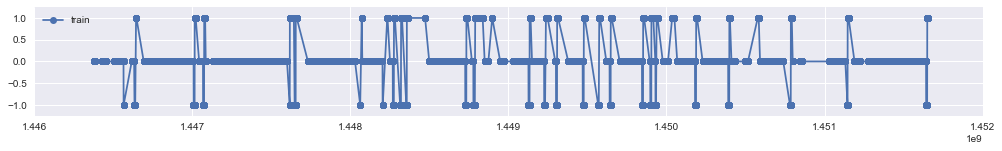

Validation Data


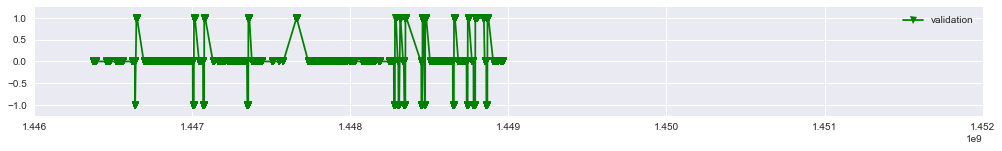

Training/Validation Data


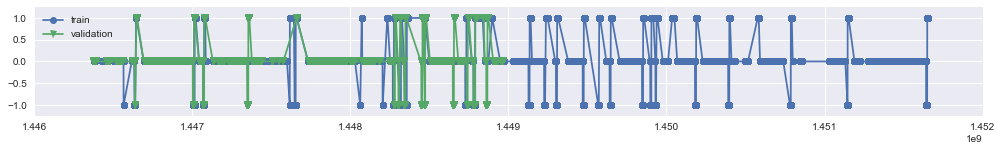

In [19]:
dummy = plt.figure(figsize=[17,2])
print('Training Data')
dummy=plt.plot(train_data['timestamp'],train_data['label'],label='train',marker='o')
dummy=plt.legend()
dummy =plt.ylim(-1.25,1.25)
dummy =plt.xlim(1.446*1e9,1.452*1e9)
dummy=plt.show()

dummy = plt.figure(figsize=[17,2])
print('Validation Data')
dummy=plt.plot(valida_data['timestamp'],valida_data['label'],label='validation', color='green',marker='v')
dummy=plt.legend()
dummy =plt.ylim(-1.25,1.25)
dummy =plt.xlim(1.446*1e9,1.452*1e9)
dummy=plt.show()

dummy = plt.figure(figsize=[17,2])
print('Training/Validation Data')
dummy=plt.plot(train_data['timestamp'],train_data['label'],label='train',marker='o')
dummy=plt.plot(valida_data['timestamp'],valida_data['label'],label='validation',marker='v')
dummy =plt.ylim(-1.25,1.25)
dummy =plt.xlim(1.446*1e9,1.452*1e9)
dummy=plt.legend()

** 所有參數的box plot **

Training
Validataion


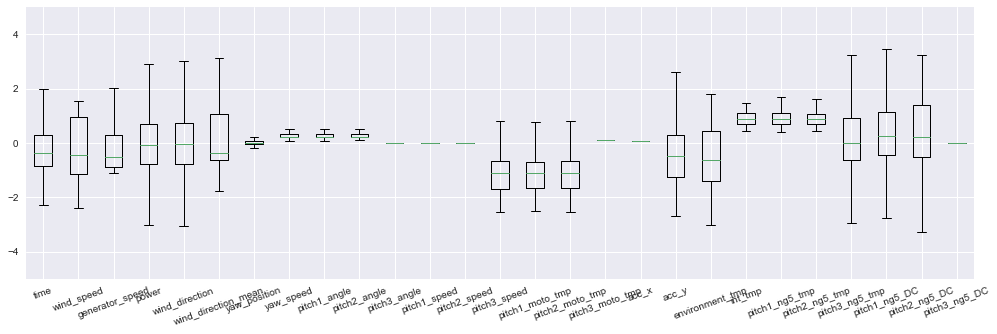

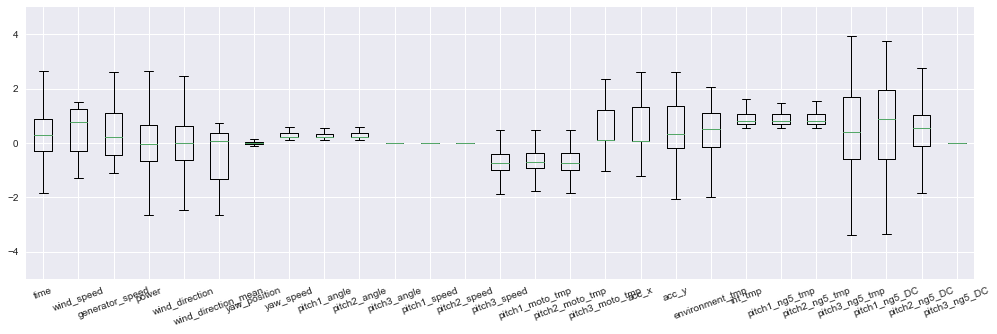

In [20]:
print('Training')
dummy = plt.figure(figsize=[17,5])
dummy=boxplot(train_data.drop(['time','timestamp','group'], axis=1).values)
dummy =plt.ylim(-5,5)
dummy =range(1,28)
dummy =plt.xticks( dummy,train_data.columns,rotation=20)

print('Validataion')
dummy = plt.figure(figsize=[17,5])
dummy=boxplot(valida_data.drop(['time','timestamp','group'], axis=1).values)
dummy =plt.ylim(-5,5)
dummy =range(1,28)
dummy =plt.xticks( dummy,valida_data.columns,rotation=20)

In [33]:
for i in train_data..columns:
    print(i)

time
wind_speed
generator_speed
power
wind_direction
wind_direction_mean
yaw_position
yaw_speed
pitch1_angle
pitch2_angle
pitch3_angle
pitch1_speed
pitch2_speed
pitch3_speed
pitch1_moto_tmp
pitch2_moto_tmp
pitch3_moto_tmp
acc_x
acc_y
environment_tmp
int_tmp
pitch1_ng5_tmp
pitch2_ng5_tmp
pitch3_ng5_tmp
pitch1_ng5_DC
pitch2_ng5_DC
pitch3_ng5_DC
group
timestamp
label


In [ ]:
#sns.boxplot(x='group',y="power",hue='label', data=train_data)
sns.violinplot(x='label', y="power", data=train_data, split=True)

** 所有參數正規化後的box plot **

In [ ]:
print('Training')
summary = train_data.describe()
train_normdata = train_data.copy()
for i in range(27):
    mean = summary.iloc[1,i]
    sd = summary.iloc[2,i]
    train_normdata.iloc[:,i:(i+1)]=(train_data.iloc[:,i:i+1] - mean)/sd

dummy = plt.figure(figsize=[17,5])
dummy=boxplot(train_normdata.drop(['time','timestamp','group'], axis=1).values)
dummy =plt.ylim(-20,20)
dummy =range(1,28)
dummy =plt.xticks( dummy,train_normdata.columns,rotation=20)

print('Validataion')
summary = valida_data.describe()
valida_normdata = valida_data.copy()
for i in range(27):
    mean = summary.iloc[1,i]
    sd = summary.iloc[2,i]
    valida_normdata.iloc[:,i:(i+1)]=(valida_data.iloc[:,i:i+1] - mean)/sd

dummy = plt.figure(figsize=[17,5])
dummy=boxplot(valida_normdata.drop(['time','timestamp','group'], axis=1).values)
dummy =plt.ylim(-20,20)
dummy =range(1,28)
dummy =plt.xticks( dummy,valida_normdata.columns,rotation=20)

** 屬性平行座標圖 **

In [ ]:
dummy = plt.figure(figsize=[17,5])
tmp=train_data.drop(['time','timestamp','group'],axis=1)
tmp=tmp[tmp['label']==1]
tmp = tmp[:100]
for index, row in tmp.iterrows():
    pcolor='red'
    dummy=row.plot(color=pcolor, alpha=0.5)
    
tmp=train_datatmp[train_datatmp['label']==0]
tmp = tmp[:100]
for index, row in tmp.iterrows():
    pcolor='green'
    dummy =range(1,28)
    dummy=row.plot(color=pcolor, alpha=0.5)
dummy =range(27)
dummy =plt.xticks( dummy,tmp.columns,rotation=20)

plt.show()
dummy = plt.figure(figsize=[17,5])
tmp=valida_data.drop(['time','timestamp','group'],axis=1)
tmp=tmp[tmp['label']==1]
tmp = tmp[:100]
for index, row in tmp.iterrows():
    pcolor='red'
    dummy=row.plot(color=pcolor, alpha=0.5)
    
tmp=train_datatmp[train_datatmp['label']==0]
tmp = tmp[:100]
for index, row in tmp.iterrows():
    pcolor='green'
    dummy =range(1,28)
    dummy=row.plot(color=pcolor, alpha=0.5)
dummy =range(27)
dummy =plt.xticks( dummy,tmp.columns,rotation=20)

**屬性-目標 對照圖**

** 每個參數的數值分佈圖 **

In [ ]:
print('Training Data')
#warnings.filterwarnings(action="ignore")
dummy = plt.figure(figsize=[24,20])
for i in range(1,28):
    item=train_normal.columns[i]
    dummy = plt.subplot(8,4,i)
    dummy = sns.distplot(train_normal[item].values, kde=False, color=normal_col)
    dummy = sns.distplot(train_abnormal[item].values, kde=False, color=abnormal_col, axlabel=item)
plt.tight_layout()

In [ ]:
print('Validation Data')
dummy = plt.figure(figsize=[24,20])
for i in range(1,28):
    item=valida_normal.columns[i]
    dummy = plt.subplot(8,4,i)
    dummy = sns.distplot(valida_normal[item].values, kde=False, color=normal_col)
    dummy = sns.distplot(valida_abnormal[item].values, kde=False, color=abnormal_col, axlabel=item)
plt.tight_layout()

In [ ]:
print('Training Data')
plt.figure(figsize=(14,12))
foo = sns.heatmap(train_data.drop(['time'],axis=1).corr(), vmax=0.6, square=True, annot=True)

In [ ]:
print('Validation Data')
plt.figure(figsize=(14,12))
foo = sns.heatmap(valida_data.drop(['time'],axis=1).corr(), vmax=0.6, square=True, annot=True)

Note: 7/13
1. cross correlation
2. auto correlation
3. common filter
4. de-train 

1. 數據問題：
- 異常區間裡面沒有X資料.  
